In [541]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.12.0
19.24.6


<a href="https://www.flaticon.com/free-icons/nose" title="nose icons">Nose icons created by Freepik - Flaticon</a>

In [542]:
import os
import matplotlib.pyplot as plt
import numpy as np
# /content/cat-whiskers.png

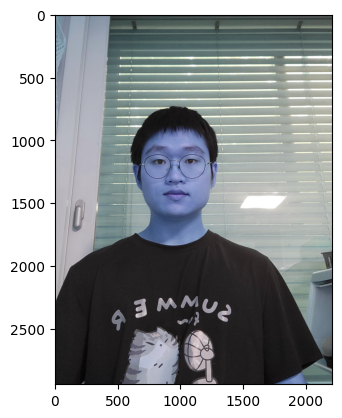

In [543]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, '/content/20250728_115057.jpg') # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
plt.imshow(img_bgr) # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂úÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•ÏùÄ ÌïòÏßÄ ÏïäÏùå)
plt.show() # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•Ìï¥Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•)

In [544]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)
# plt.show()

In [545]:
detector_hog = dlib.get_frontal_face_detector()

In [546]:
dlib_rects = detector_hog(img_rgb, 1)

In [547]:
print(f"Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠: {dlib_rects}")

Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠: rectangles[[(664, 1035) (1219, 1589)]]


In [548]:
for dlib_rect in dlib_rects: # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëú
    l = dlib_rect.left() # ÏôºÏ™Ω
    t = dlib_rect.top() # ÏúÑÏ™Ω
    r = dlib_rect.right() # Ïò§Î•∏Ï™Ω
    b = dlib_rect.bottom() # ÏïÑÎûòÏ™Ω
    img_rgb = cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # ÏãúÏûëÏ†êÏùò Ï¢åÌëúÏôÄ Ï¢ÖÎ£åÏ†ê Ï¢åÌëúÎ°ú ÏßÅÍ∞Å ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶º

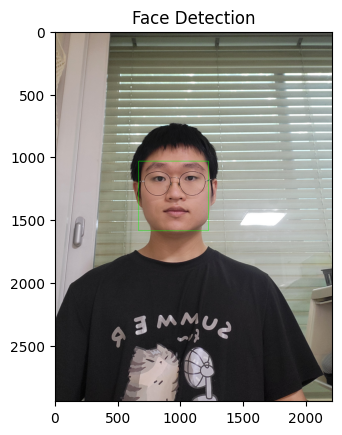

Ï≤´ Î≤àÏß∏ ÏñºÍµ¥ ÏòÅÏó≠ Ï¢åÌëú (l, t, r, b): (664, 1035, 1219, 1589)


In [549]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.title("Face Detection")
plt.show()
print(f"Ï≤´ Î≤àÏß∏ ÏñºÍµ¥ ÏòÅÏó≠ Ï¢åÌëú (l, t, r, b): ({l}, {t}, {r}, {b})")

In [550]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 /content/abcd
!bzip2 -d /content/abcd/shape_predictor_68_face_landmarks.dat.bz2

--2025-07-28 08:12:55--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-07-28 08:12:56--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‚Äòshape_predictor_68_face_landmarks.dat.bz2‚Äô

shape_predictor_68_ 100%[===================>]  61.07M  35.4MB/s    in 1.7s    

2025-07-28 08:12:58 (35.4 MB/s) - ‚Äòshape_predictor_68_face_landmarks.dat.bz2‚Äô saved [64040097/64040097]

bzip2: Output file /content/abcd/shape_predictor_68_face_landmarks.dat already exists.


In [551]:
model_path = os.path.join(home_dir, '/content/abcd/shape_predictor_68_face_landmarks.dat')
    # Ï†ÄÏû•Ìïú landmark Î™®Îç∏Ïùò Ï£ºÏÜåÎ•º model_path Î≥ÄÏàòÏóê Ï†ÄÏû•
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò shape_predictor Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¥
    # landmark_predictorÎäî RGBÏù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÎ•º ÏûÖÎ†• Î∞õÍ≥† dlib.full_object_detectionÎ•º Î∞òÌôò
    # dlib.rectangle: ÎÇ¥Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î∞ïÏä§
    # dlib.full_object_detection: Í∞Å Íµ¨ÏÑ± ÏöîÏÜåÏùò ÏúÑÏπòÏôÄ, Ïù¥ÎØ∏ÏßÄ ÏÉÅÏùò Í∞ùÏ≤¥Ïùò ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÉÑ
print("üå´üõ∏")

üå´üõ∏


In [552]:
list_landmarks = []
    # ÎûúÎìúÎßàÌÅ¨Ïùò ÏúÑÏπòÎ•º Ï†ÄÏû•Ìï† list ÏÉùÏÑ±

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
# face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # Î™®Îì† landmarkÏùò ÏúÑÏπòÏ†ïÎ≥¥Î•º points Î≥ÄÏàòÏóê Ï†ÄÏû•
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # Í∞ÅÍ∞ÅÏùò landmark ÏúÑÏπòÏ†ïÎ≥¥Î•º (x,y) ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÏó¨ list_points Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
    list_landmarks.append(list_points)
        # list_landmarksÏóê ÎûúÎìúÎßàÌÅ¨ Î¶¨Ïä§Ìä∏Î•º Ï†ÄÏû•

print(len(list_landmarks[0]))
    # ÏñºÍµ¥Ïù¥ nÍ∞úÏù∏ Í≤ΩÏö∞ list_landmarksÎäî nÍ∞úÏùò ÏõêÏÜåÎ•º Í∞ñÍ≥†
    # Í∞Å ÏõêÏÜåÎäî 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨ ÏúÑÏπòÍ∞Ä ÎÇòÏó¥Îêú list
    # list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú list_landmarks[1]ÏùÑ Ìò∏Ï∂úÌïòÎ©¥ IndexErrorÍ∞Ä Î∞úÏÉù

68


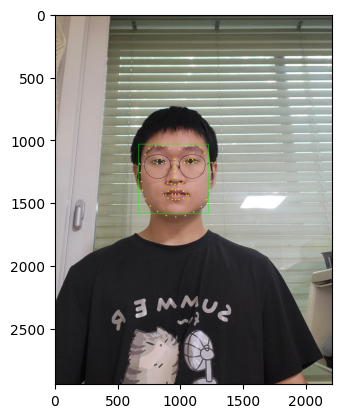

In [553]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), 5)
            # cv2.circle: OpenCVÏùò ÏõêÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò
            # img_show Ïù¥ÎØ∏ÏßÄ ÏúÑ Í∞ÅÍ∞ÅÏùò pointÏóê
            # ÌÅ¨Í∏∞Í∞Ä 2Ïù¥Í≥† (0, 255, 255)ÏÉâÏúºÎ°ú ÎÇ¥Î∂ÄÍ∞Ä Ï±ÑÏõåÏßÑ(-1) ÏõêÏùÑ Í∑∏Î¶º
            # (ÎßàÏßÄÎßâ Ïù∏ÏàòÍ∞Ä ÏûêÏó∞ÏàòÎùºÎ©¥ Í∑∏ÎßåÌÅºÏùò ÎëêÍªòÏùò ÏÑ†ÏúºÎ°ú ÏõêÏù¥ Í∑∏Î†§Ïßê)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÑÌôò
plt.imshow(img_show_rgb)
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï§ÄÎπÑ
plt.show()
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•

In [554]:
sticker_path = os.path.join(home_dir, '/content/cat-whiskers.png') # ÏàòÏóº Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°ú
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§ // cv2.imread(Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú) ‚Üí imageÍ∞ùÏ≤¥ ÌñâÎ†¨ÏùÑ Î∞òÌôò
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï°∞Ï†ï ‚Üí w,hÎäî ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò(556) // cv2.resize(imageÍ∞ùÏ≤¥ ÌñâÎ†¨, (Í∞ÄÎ°ú Í∏∏Ïù¥, ÏÑ∏Î°ú Í∏∏Ïù¥))
print (img_sticker.shape) # ÏÇ¨Ïù¥Ï¶àÎ•º Ï°∞Ï†ïÌïú ÏàòÏóº Ïù¥ÎØ∏ÏßÄÏùò Ï∞®Ïõê ÌôïÏù∏

(556, 556, 3)


In [555]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÍ≥º 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Î•º Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÏúºÎ°ú Î∞òÎ≥µÎ¨∏ Ïã§Ìñâ
    print (landmark[51])
    x = (landmark[51][0] +landmark[33][0]) // 2 #Ïù∏Ï§ë ÌïúÍ∞ÄÏö¥Îç∞Î°ú
    y = (landmark[51][1] +landmark[33][1]) // 2 - dlib_rect.height() // 2
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    #Ïù∏Ï§ëÏù¥ 957, 1101

(957, 1402)
(x,y) : (955,1101)
(w,h) : (556,556)


In [556]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑú x, y Ï¢åÌëúÎ•º Ï°∞Ï†ïÌï©ÎãàÎã§. Ïù¥ÎØ∏ÏßÄ ÏãúÏûëÏ†êÏùÄ top-left Ï¢åÌëúÏù¥Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
# Ï¶â, refined_x, refined_yÍ∞íÏóêÏÑú ÏàòÏóº Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏãúÏûëÎê®
refined_x = x - w //2
refined_y = y
print (f'(refined x,refined y) : ({refined_x},{refined_y})')
# print(w,h)
# print(x,y)

(refined x,refined y) : (677,1101)


In [557]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# img_stickerÏóêÏÑú Ìù∞ÏÉâ ÌîΩÏÖÄÏùÑ Ï∞æÍ∏∞ ÏúÑÌïú ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏùò Í∞Å ÌîΩÏÖÄÏù¥ (255, 255, 255) (Ìù∞ÏÉâ)Ïù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
white_pixel_mask = np.all(img_sticker == [255, 255, 255], axis=-1, keepdims=True)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(white_pixel_mask, sticker_area, img_sticker).astype(np.uint8)

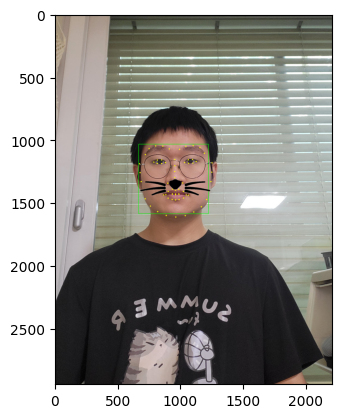

In [558]:
# ÏàòÏóº Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÅÏö©Ìïú Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§ÄÎã§.
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

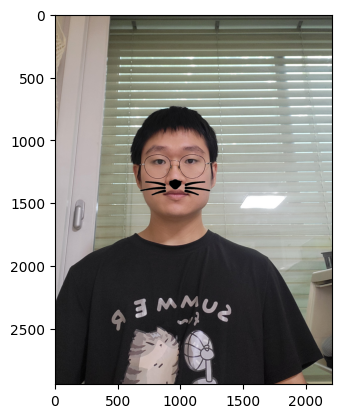

In [559]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(white_pixel_mask, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÖÄÌîÑ Ïπ¥Î©îÎùº Ï¥¨ÏòÅ Ïãú ÏñºÍµ¥Ïùò Í∞ÅÎèÑÎÇò Î∞©Ìñ•ÏùÑ Î≥ÄÍ≤ΩÌï† Í≤ΩÏö∞, Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏñºÍµ¥Ïùò ÌòïÌÉú Î≥ÄÌôîÏóê ÎßûÏ∂∞ ÏûêÏó∞Ïä§ÎüΩÍ≤å Î≥ÄÌòïÎêòÏßÄ ÏïäÍ≥† Î∂ÄÏûêÏó∞Ïä§ÎüΩÍ≤å Ï†ÅÏö©ÎêòÎäî ÌòÑÏÉÅÏù¥ Î≥¥Ïù∏Îã§. Ïù¥Îäî Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©ÌïòÎäî Î°úÏßÅÏù¥ 2Ï∞®ÏõêÏ†ïÎ≥¥ÎßåÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. Ïù¥Ïóê 3d ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨Î•º ÌôúÏö©ÌïòÎ©¥ ÏñºÍµ¥Ïù¥ ÌãÄÏñ¥ÏßÄÍ±∞ÎÇò Í∏∞Ïö∏Ïñ¥Ï†∏ ÏûàÎäî ÏñºÍµ¥ÏóêÎèÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. ÎòêÌïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÑ ÌÜµÌï¥ Í∏∞Ïö∏Ïñ¥ÏßÑ ÏñºÍµ¥Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌïúÎã§Î©¥ 3d ÎûúÎìúÎßàÌÅ¨Î•º Ï∞æÎäî Î™®Îç∏Ïóê Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌôúÏö© Í∞ÄÎä•Ìï† Í≤É Í∞ôÎã§.